In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.isnull() #check for null values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Distribution plot of Numerical Data

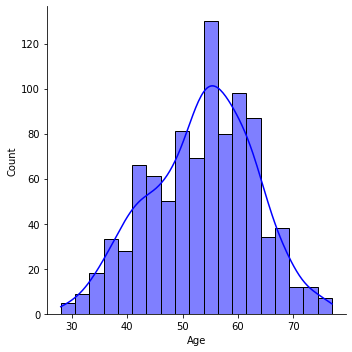

In [7]:
sns.displot(df['Age'], kde = True, color = 'blue') # Distribution plot of Age

### Pie Charts for Categorical Data

<Axes: >

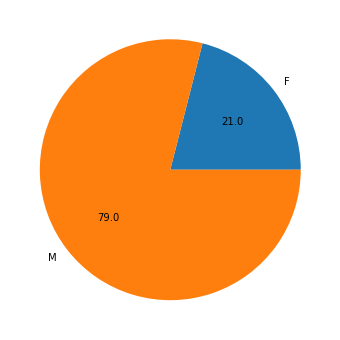

In [8]:
df.groupby('Sex').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

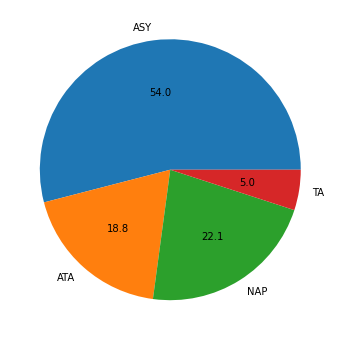

In [9]:
df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

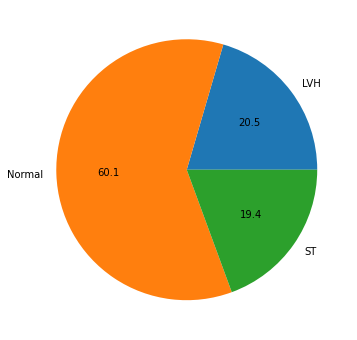

In [10]:
df.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

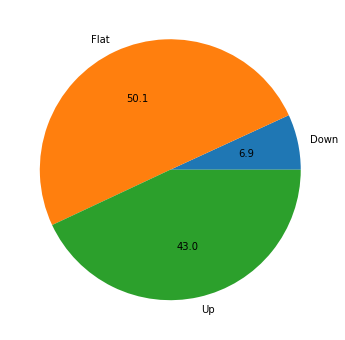

In [11]:
df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

<Axes: >

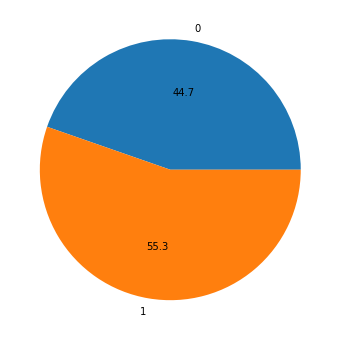

In [12]:
df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.1f', figsize = (6,6))

### Countplot

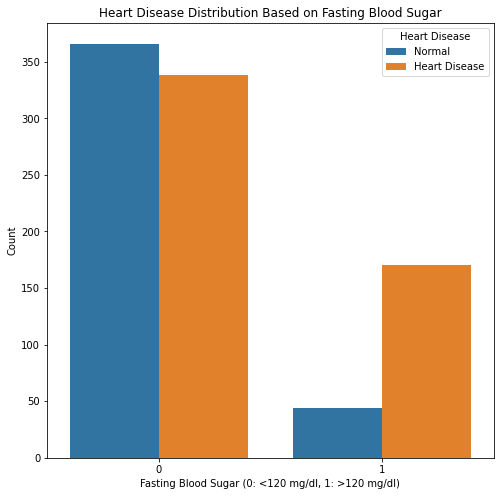

In [13]:
plt.figure(figsize=(8, 8))
sns.countplot(x='FastingBS', hue='HeartDisease', data=df)
plt.title('Heart Disease Distribution Based on Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (0: <120 mg/dl, 1: >120 mg/dl)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Normal', 'Heart Disease'])
plt.show()

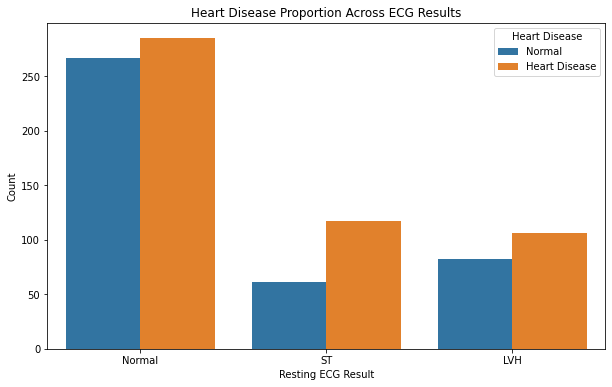

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
plt.title('Heart Disease Proportion Across ECG Results')
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Normal', 'Heart Disease'])
plt.show()

### Violinplot

<Axes: xlabel='HeartDisease', ylabel='Sex'>

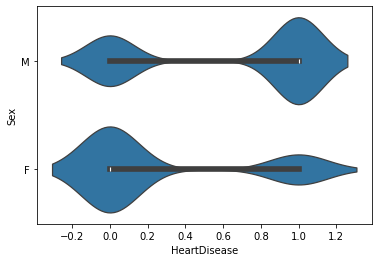

In [15]:
sns.violinplot(y = 'Sex', x = 'HeartDisease', data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

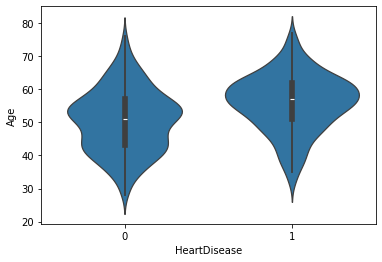

In [16]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

### Correlation - Heatmap

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

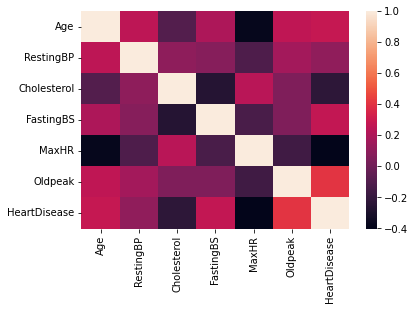

In [18]:
sns.heatmap(numeric_df.corr())

### JointPlot

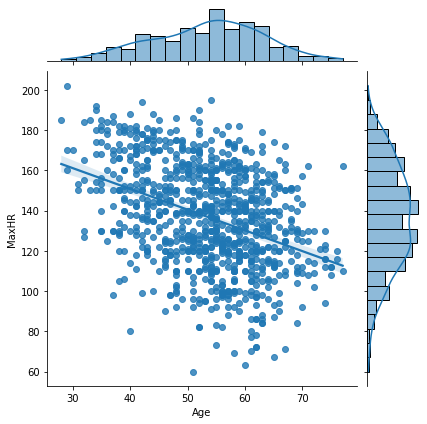

In [19]:
sns.jointplot(x = 'Age', y = "MaxHR", data = df, kind = 'reg')

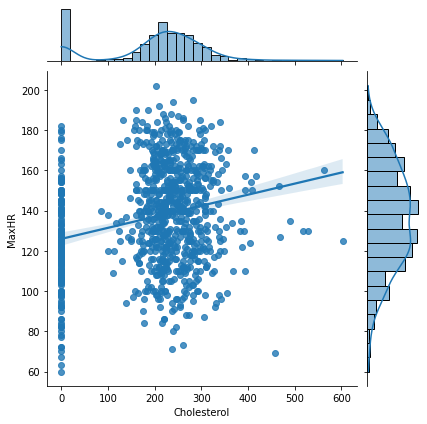

In [20]:
sns.jointplot(x = 'Cholesterol' , y = 'MaxHR', data = df, kind = 'reg')

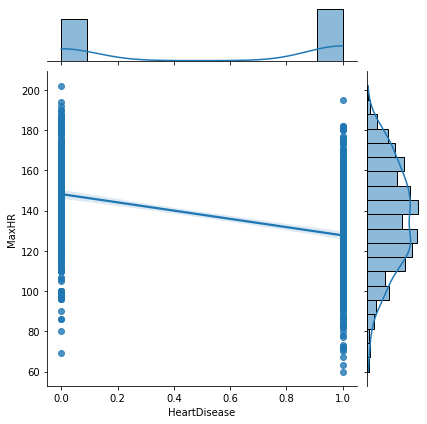

In [21]:
sns.jointplot(x = 'HeartDisease' , y = 'MaxHR', data = df, kind = 'reg')

### Pairplot

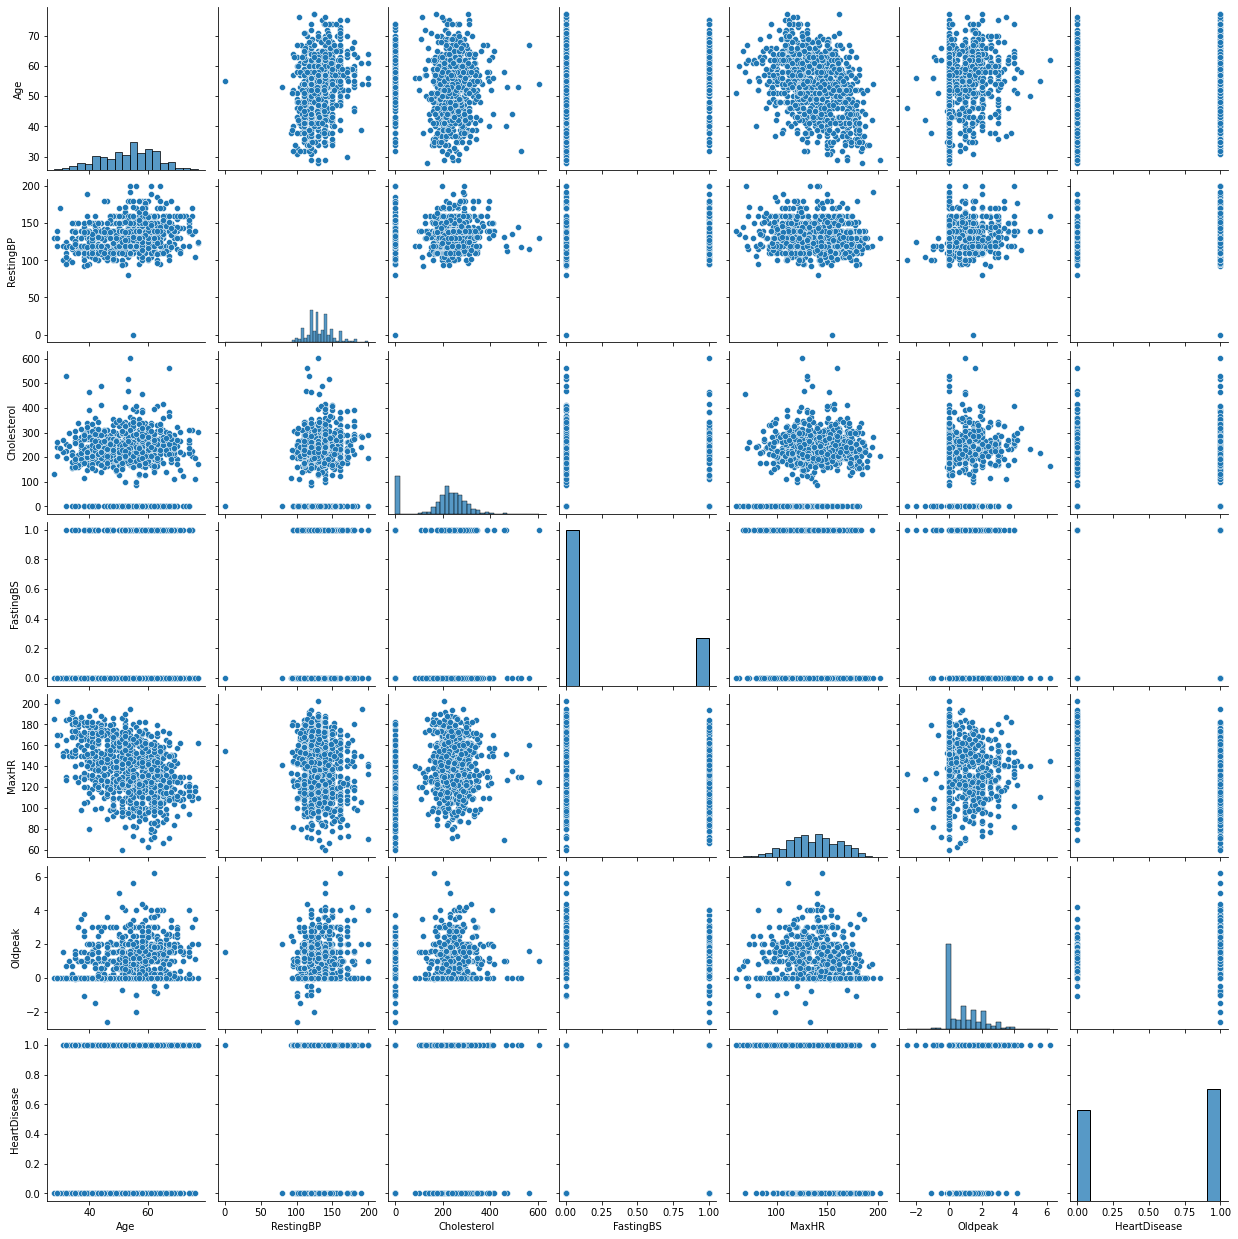

In [22]:
sns.pairplot(df)

### Conclusion: